In [2]:
import numpy as np
import pandas as pd
import json
import ast

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def get_resp_dict(df, item):
    df = df[df["key"] == item]
    df.reset_index(inplace=True)
    string = df["option_mapping"][0]
    a = ast.literal_eval(string)
    res = dict((v,k) for k,v in a.items())

    return(res)

info_df = pd.read_csv("data/human_resp/American_Trends_Panel_W34/info.csv")
key_vars = info_df.key.to_list()

df = pd.read_csv("data/human_resp/American_Trends_Panel_W34/responses.csv")
df = df[key_vars]

for c in df.columns:
    rdict = get_resp_dict(info_df, c)
    df[c] = df[c].map(rdict)

df_long = pd.melt(df.reset_index(), id_vars='index')


<AxesSubplot: >

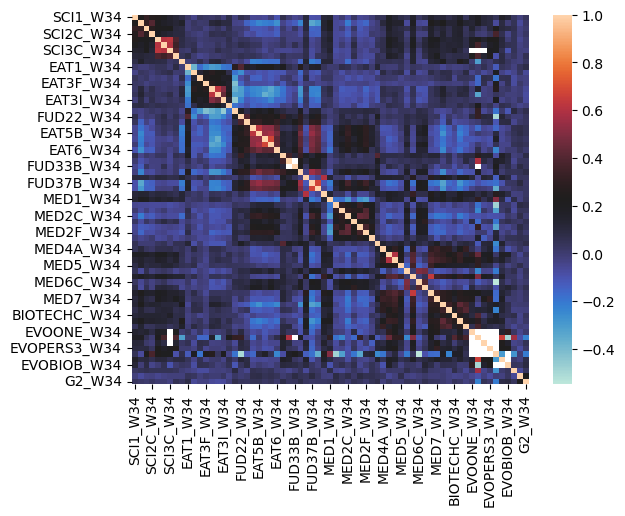

In [4]:
x = df.replace(99.0, np.NaN).corr()
sns.heatmap(x, cmap = 'icefire')

In [5]:
# x.head(50)
pd.melt(x.reset_index(), "index").loc[lambda x: (x.value > .5) & (x.value < .99)]

,index,variable,value
273,SCI3B_W34,SCI3A_W34,0.610655
274,SCI3C_W34,SCI3A_W34,0.630893
339,SCI3A_W34,SCI3B_W34,0.610655
341,SCI3C_W34,SCI3B_W34,0.606348
406,SCI3A_W34,SCI3C_W34,0.630893
407,SCI3B_W34,SCI3C_W34,0.606348
885,EAT3H_W34,EAT3G_W34,0.622817
886,EAT3I_W34,EAT3G_W34,0.502528
951,EAT3G_W34,EAT3H_W34,0.622817
1018,EAT3G_W34,EAT3I_W34,0.502528


In [51]:
#### combine variables pairwise according to correlations to examine influences

var1 = []
var2 = []
corrval = []

# for every column in corr matrix
for c in x.columns:
    corrs = x[c].sort_values()
    # find 10 strongest pos and neg correlations
    neg = corrs[:5]
    pos = corrs[-6:-1]
    # and 10 random others
    rand = corrs[5:-6].sample(n=5)

# and then concat combinations of names, plus corr values
    out = pd.concat([pos, neg, rand])
    corrval.extend(out.to_list())
    var2.extend(out.index.to_list())
    var1.extend([c]*5*3)

df2 = pd.DataFrame({"var1":var1, "var2":var2, "corr":corrval})

df2


,var1,var2,corr
0,SCI1_W34,SCI3B_W34,0.195653
1,SCI1_W34,SCI2A_W34,0.235727
2,SCI1_W34,SCI3A_W34,0.254028
3,SCI1_W34,SCI2C_W34,0.258629
4,SCI1_W34,SCI2B_W34,0.314973
...,...,...,...
1000,G2_W34,SCI2B_W34,0.006788
1001,G2_W34,EAT3J_W34,-0.019928
1002,G2_W34,SCI4_W34,0.050300
1003,G2_W34,MED6B_W34,0.031081


Index(['SCI1_W34'], dtype='object')